In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_excel('golden answers-final.xlsx', sheet_name='FINAL_EDITS_NULLS_JOINED')
filtered_cols = [col for col in df.columns if col.endswith('Output Time') or col.endswith('_time')]
df = df[filtered_cols]
new_column_names = {col: col.replace(' Output Time', '').replace('_time', '').replace(' prompt summary', '').strip() for col in df.columns}
df.rename(columns=new_column_names, inplace=True)
df.head()

,Llama QLORA,pretrained Mistral,Mistral QLORA,Llama RAFT,Mistral RAFT,pretrained Llama,Llama_RAG_CRC,mistral_RAG_CRC,mistral_RAG_RR,llama_RAG_RR,Llama RAFT RAG CRC,Mistral RAFT RAG CRC GPT,Mistral QLORA RAG CRC GPT,Llama QLORA RAG CRC GPT,Mistral_RLHF
0,41.932598,13.481630,44.045858,41.915598,19.330452,36.654387,39.016824,36.602453,29.159688,33.522575,31.187494,19.854798,33.910792,31.783803,21.988402
1,39.419098,21.060485,41.352439,39.339942,41.501848,29.456541,17.231231,21.188616,15.517743,29.259994,29.637119,33.607804,31.736788,30.685412,41.801014
2,40.425609,21.164471,42.441245,40.409974,42.497019,49.190539,34.161558,20.959812,15.637804,34.950972,32.058554,35.208084,35.432003,33.631749,43.005429
3,41.932797,18.851281,44.109241,41.830973,44.061522,24.616672,24.759005,19.484634,27.621347,25.157796,35.006019,31.639090,38.979841,36.452926,44.611541
4,40.962956,14.518653,42.913752,40.861646,42.898820,32.956461,23.100356,19.919633,21.001790,30.591976,30.003522,31.968123,32.279507,30.209668,43.394086


In [12]:
df.columns

Index(['Llama QLORA', 'pretrained Mistral', 'Mistral QLORA', 'Llama RAFT',
       'Mistral RAFT', 'pretrained Llama', 'Llama_RAG_CRC', 'mistral_RAG_CRC',
       'mistral_RAG_RR', 'llama_RAG_RR', 'Llama RAFT RAG CRC',
       'Mistral RAFT RAG CRC GPT', 'Mistral QLORA RAG CRC GPT',
       'Llama QLORA RAG CRC GPT', 'Mistral_RLHF'],
      dtype='object')

In [13]:
df = df[['pretrained Llama',
         'pretrained Mistral', 
         'Llama QLORA',
         'Mistral QLORA', 
         'Llama RAFT',
         'Mistral RAFT',
         'Llama_RAG_CRC',
         'mistral_RAG_CRC',
         'llama_RAG_RR',
         'mistral_RAG_RR',
         'Llama QLORA RAG CRC GPT',
         'Mistral QLORA RAG CRC GPT',
         'Llama RAFT RAG CRC',
         'Mistral RAFT RAG CRC GPT',
         'Mistral_RLHF']]

In [14]:
averages = df.mean()
averages #series

pretrained Llama             22.474837
pretrained Mistral           13.529111
Llama QLORA                  41.735216
Mistral QLORA                43.942860
Llama RAFT                   41.747693
Mistral RAFT                 37.270752
Llama_RAG_CRC                16.848279
mistral_RAG_CRC              12.751129
llama_RAG_RR                 24.777359
mistral_RAG_RR               16.328663
Llama QLORA RAG CRC GPT      32.997929
Mistral QLORA RAG CRC GPT    34.685469
Llama RAFT RAG CRC           30.699274
Mistral RAFT RAG CRC GPT     31.546142
Mistral_RLHF                 36.283538
dtype: float64

In [15]:
avg_df = pd.DataFrame({'Model': df.columns, 'Average Inference Time': averages.values})
avg_df.to_csv('inference_time_model_average.csv')
avg_df

,Model,Average Inference Time
0,pretrained Llama,22.474837
1,pretrained Mistral,13.529111
2,Llama QLORA,41.735216
3,Mistral QLORA,43.942860
4,Llama RAFT,41.747693
5,Mistral RAFT,37.270752
6,Llama_RAG_CRC,16.848279
7,mistral_RAG_CRC,12.751129
8,llama_RAG_RR,24.777359
9,mistral_RAG_RR,16.328663


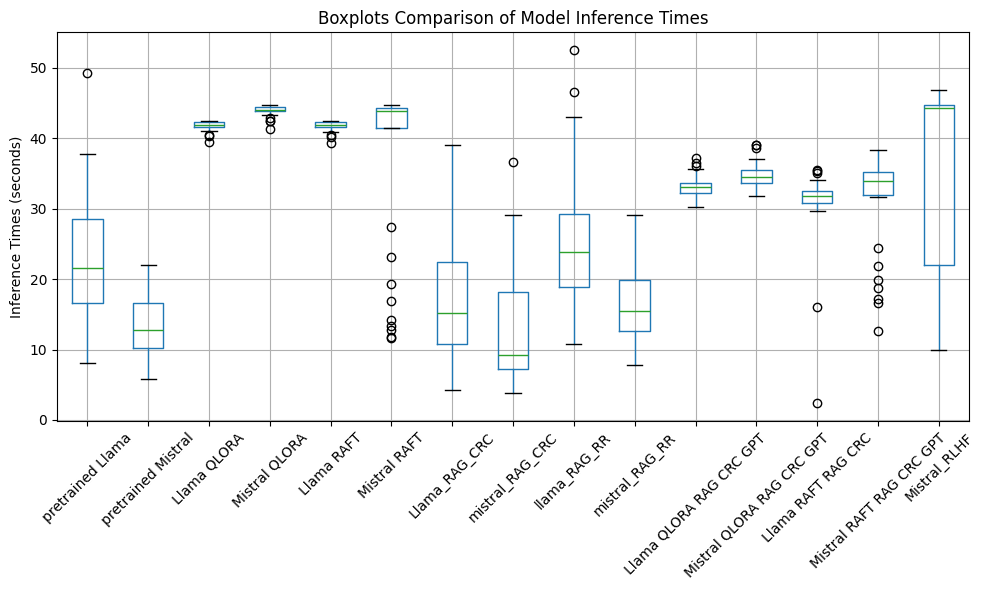

In [16]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
df.boxplot(rot=45)  # Rotate x-axis labels for better readability
plt.title('Boxplots Comparison of Model Inference Times')
plt.ylabel('Inference Times (seconds)')
plt.tight_layout()
plt.savefig('average_inference_time_plot.png')
plt.show()

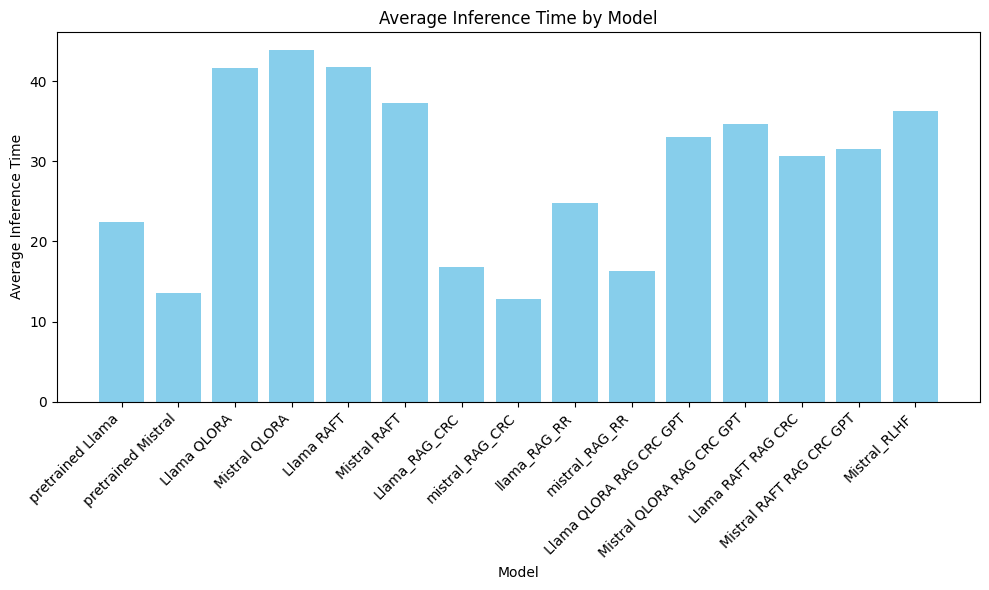

In [17]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(avg_df['Model'], avg_df['Average Inference Time'], color='skyblue')
plt.title('Average Inference Time by Model')
plt.xlabel('Model')
plt.ylabel('Average Inference Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [18]:
df2 = pd.read_excel('golden answers-final.xlsx', sheet_name='FINAL_EDITS_NULLS_JOINED')
filtered_cols = [col for col in df2.columns if not col.endswith('Output Time')]
df2 = df2[filtered_cols]
new_column_names = {col: col.replace(' Output', '').replace(' prompt summary', '').strip() for col in df2.columns}
df2.rename(columns=new_column_names, inplace=True)


In [19]:
df2.columns

Index(['Index', 'Notes', 'Golden Question', 'Golden Answer', 'MPC',
       'Llama QLORA', 'pretrained Mistral', 'Mistral QLORA', 'Llama RAFT',
       'Mistral RAFT', 'pretrained Llama', 'Llama_RAG_CRC',
       'Llama_RAG_CRC_time', 'mistral_RAG_CRC', 'mistral_RAG_CRC_time',
       'mistral_RAG_RR', 'mistral_RAG_RR_time', 'llama_RAG_RR',
       'llama_RAG_RR_time', 'Llama RAFT RAG CRC', 'Mistral RAFT RAG CRC GPT',
       'Mistral QLORA RAG CRC GPT', 'Llama QLORA RAG CRC GPT', 'Mistral_RLHF',
       'Mistral_RLHF_time'],
      dtype='object')

In [20]:
df2 = df2[['pretrained Llama',
         'pretrained Mistral', 
         'Llama QLORA',
         'Mistral QLORA', 
         'Llama RAFT',
         'Mistral RAFT',
         'Llama_RAG_CRC',
         'mistral_RAG_CRC',
         'llama_RAG_RR',
         'mistral_RAG_RR',
         'Llama QLORA RAG CRC GPT',
         'Mistral QLORA RAG CRC GPT',
         'Llama RAFT RAG CRC',
         'Mistral RAFT RAG CRC GPT',
         'Mistral_RLHF']]

In [21]:
def count_words(s):
    return len(s.split())

df2 = df2.applymap(count_words)
df2.head()

/var/folders/v3/lgdm_3ps7sz27bbjm7cmzbsm0000gp/T/ipykernel_77571/4042550202.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(count_words)


,pretrained Llama,pretrained Mistral,Llama QLORA,Mistral QLORA,Llama RAFT,Mistral RAFT,Llama_RAG_CRC,mistral_RAG_CRC,llama_RAG_RR,mistral_RAG_RR,Llama QLORA RAG CRC GPT,Mistral QLORA RAG CRC GPT,Llama RAFT RAG CRC,Mistral RAFT RAG CRC GPT,Mistral_RLHF
0,476,261,135,197,533,288,478,445,357,355,247,45,339,404,459
1,519,415,67,21,71,479,276,288,405,200,50,44,576,660,431
2,792,414,131,22,534,835,498,345,403,253,128,120,546,781,442
3,421,362,295,14,909,500,381,306,408,448,308,138,668,685,443
4,610,279,208,962,515,825,282,235,414,287,49,62,642,623,314


In [22]:
df.head()

,pretrained Llama,pretrained Mistral,Llama QLORA,Mistral QLORA,Llama RAFT,Mistral RAFT,Llama_RAG_CRC,mistral_RAG_CRC,llama_RAG_RR,mistral_RAG_RR,Llama QLORA RAG CRC GPT,Mistral QLORA RAG CRC GPT,Llama RAFT RAG CRC,Mistral RAFT RAG CRC GPT,Mistral_RLHF
0,36.654387,13.481630,41.932598,44.045858,41.915598,19.330452,39.016824,36.602453,33.522575,29.159688,31.783803,33.910792,31.187494,19.854798,21.988402
1,29.456541,21.060485,39.419098,41.352439,39.339942,41.501848,17.231231,21.188616,29.259994,15.517743,30.685412,31.736788,29.637119,33.607804,41.801014
2,49.190539,21.164471,40.425609,42.441245,40.409974,42.497019,34.161558,20.959812,34.950972,15.637804,33.631749,35.432003,32.058554,35.208084,43.005429
3,24.616672,18.851281,41.932797,44.109241,41.830973,44.061522,24.759005,19.484634,25.157796,27.621347,36.452926,38.979841,35.006019,31.639090,44.611541
4,32.956461,14.518653,40.962956,42.913752,40.861646,42.898820,23.100356,19.919633,30.591976,21.001790,30.209668,32.279507,30.003522,31.968123,43.394086


In [23]:
per_token = df/df2
per_token.head()

,pretrained Llama,pretrained Mistral,Llama QLORA,Mistral QLORA,Llama RAFT,Mistral RAFT,Llama_RAG_CRC,mistral_RAG_CRC,llama_RAG_RR,mistral_RAG_RR,Llama QLORA RAG CRC GPT,Mistral QLORA RAG CRC GPT,Llama RAFT RAG CRC,Mistral RAFT RAG CRC GPT,Mistral_RLHF
0,0.077005,0.051654,0.310612,0.223583,0.078641,0.067120,0.081625,0.082253,0.093901,0.082140,0.128679,0.753573,0.091999,0.049146,0.047905
1,0.056756,0.050748,0.588345,1.969164,0.554084,0.086643,0.062432,0.073572,0.072247,0.077589,0.613708,0.721291,0.051453,0.050921,0.096986
2,0.062109,0.051122,0.308592,1.929148,0.075674,0.050895,0.068598,0.060753,0.086727,0.061810,0.262748,0.295267,0.058715,0.045081,0.097297
3,0.058472,0.052075,0.142145,3.150660,0.046019,0.088123,0.064984,0.063675,0.061661,0.061655,0.118354,0.282463,0.052404,0.046188,0.100703
4,0.054027,0.052038,0.196937,0.044609,0.079343,0.051999,0.081916,0.084764,0.073894,0.073177,0.616524,0.520637,0.046734,0.051313,0.138198


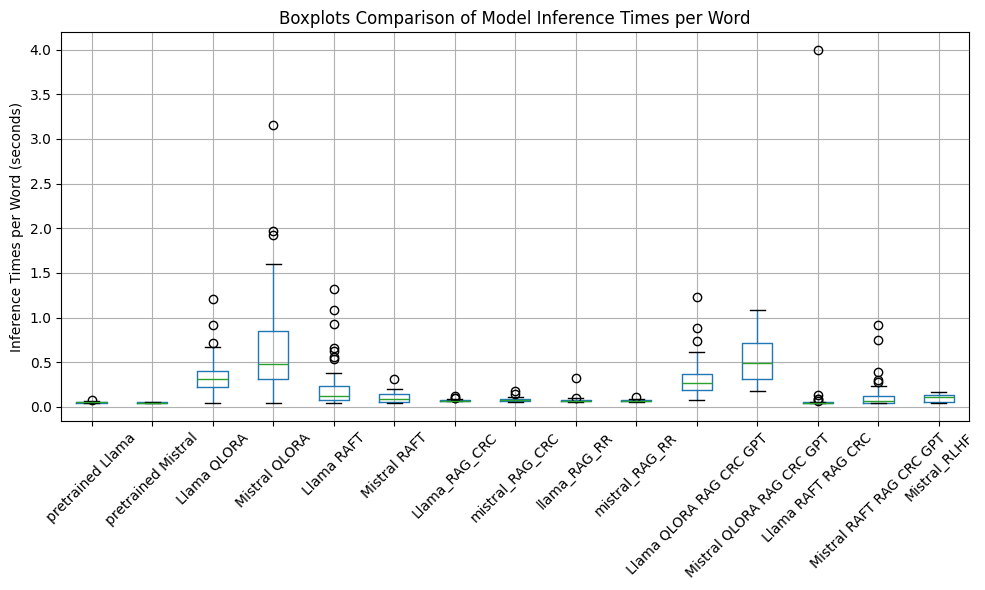

In [24]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
per_token.boxplot(rot=45)  # Rotate x-axis labels for better readability
plt.title('Boxplots Comparison of Model Inference Times per Word')
plt.ylabel('Inference Times per Word (seconds)')
plt.tight_layout()
plt.savefig('average_inference_time_per_word_plot.png')
plt.show()

In [25]:
averages2 = per_token.mean()
avg_pw_df = pd.DataFrame({'Model': df2.columns, 'Average Inference Time': averages2.values})
avg_pw_df.to_csv('inference_time_per_word_model_average.csv')
avg_pw_df

,Model,Average Inference Time
0,pretrained Llama,0.053004
1,pretrained Mistral,0.047073
2,Llama QLORA,0.365199
3,Mistral QLORA,0.712782
4,Llama RAFT,0.250448
5,Mistral RAFT,0.104823
6,Llama_RAG_CRC,0.075710
7,mistral_RAG_CRC,0.081101
8,llama_RAG_RR,0.080706
9,mistral_RAG_RR,0.069514
